In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read in csv using pandas
cancer_df = pd.read_csv("../data/cervical_cancer.csv")

In [3]:
#visualize
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# unanswered questions are filled in with a "?", so we need to replace with NaN and turn object into numeric type
cancer_nan = cancer_df.replace('?', np.nan)

In [5]:
#numeric_df = cancer_nan.astype('float64') the problem with this is that everything is converted to floats
#just want to convert object columns to numeric
numeric_df = cancer_nan.convert_objects(convert_numeric=True)

In [6]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [7]:
#check NaN counts
numeric_df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [52]:
# Fill in  NAN values with mean, as done by authors of paper who collected this data

numeric_df['Number of sexual partners'] = numeric_df['Number of sexual partners'].fillna(numeric_df['Number of sexual partners'].mean())
numeric_df['Number of sexual partners'] = numeric_df['Number of sexual partners'].round(decimals=0)
numeric_df['First sexual intercourse'] = numeric_df['First sexual intercourse'].fillna(numeric_df['First sexual intercourse'].mean())
numeric_df['Num of pregnancies'] = numeric_df['Num of pregnancies'].fillna(numeric_df['Num of pregnancies'].mean())
numeric_df['Num of pregnancies'] = numeric_df['Num of pregnancies'].round(decimals=0)


In [53]:
#determine how to fill in Smokes values -- what is most common answer?
#Also, the fact that there are 13 missing values for smokes/smokesyears/smokes packs
#makes me believe that non-smokers left the columns blank
numeric_df["Smokes"].value_counts()

0.0    735
1.0    123
Name: Smokes, dtype: int64

In [54]:
numeric_df['Smokes'] = numeric_df['Smokes'].fillna(0)
numeric_df['Smokes (years)'] = numeric_df['Smokes (years)'].fillna(0)
numeric_df['Smokes (packs/year)'] = numeric_df['Smokes (packs/year)'].fillna(0)

In [55]:
numeric_df["Hormonal Contraceptives"].value_counts()

1.0    481
0.0    377
Name: Hormonal Contraceptives, dtype: int64

In [56]:
numeric_df['Hormonal Contraceptives'] = numeric_df['Hormonal Contraceptives'].fillna(0)
numeric_df['Hormonal Contraceptives (years)'] = numeric_df['Hormonal Contraceptives (years)'].fillna(numeric_df['Hormonal Contraceptives (years)'].mean())


In [57]:
numeric_df["IUD"].value_counts()

0.0    775
1.0     83
Name: IUD, dtype: int64

In [58]:
numeric_df['IUD'] = numeric_df['IUD'].fillna(0)
numeric_df['IUD (years)'] = numeric_df['IUD (years)'].fillna(0) 

In [59]:
numeric_df["STDs"].value_counts()

0.0    779
1.0     79
Name: STDs, dtype: int64

In [60]:
numeric_df['STDs'] = numeric_df['STDs'].fillna(0)
numeric_df['STDs (number)'] = numeric_df['STDs (number)'].fillna(0)

In [61]:
numeric_df['STDs:condylomatosis'].value_counts()

0.0    814
1.0     44
Name: STDs:condylomatosis, dtype: int64

In [62]:
numeric_df['STDs:condylomatosis'] = numeric_df['STDs:condylomatosis'].fillna(0)

In [63]:
numeric_df['STDs:cervical condylomatosis'].value_counts()

0.0    858
Name: STDs:cervical condylomatosis, dtype: int64

In [64]:
numeric_df['STDs:cervical condylomatosis'] = numeric_df['STDs:cervical condylomatosis'].fillna(0)

In [65]:
numeric_df['STDs:vaginal condylomatosis'] = numeric_df['STDs:vaginal condylomatosis'].fillna(0)
numeric_df['STDs:vulvo-perineal condylomatosis'] = numeric_df['STDs:vulvo-perineal condylomatosis'].fillna(0)
numeric_df['STDs:syphilis'] = numeric_df['STDs:syphilis'].fillna(0)
numeric_df['STDs:pelvic inflammatory disease'] = numeric_df['STDs:pelvic inflammatory disease'].fillna(0)
numeric_df['STDs:genital herpes'] = numeric_df['STDs:genital herpes'].fillna(0)
numeric_df['STDs:molluscum contagiosum'] = numeric_df['STDs:molluscum contagiosum'].fillna(0)
numeric_df['STDs:AIDS'] = numeric_df['STDs:AIDS'].fillna(0)
numeric_df['STDs:HIV'] = numeric_df['STDs:HIV'].fillna(0)
numeric_df['STDs:Hepatitis B'] = numeric_df['STDs:Hepatitis B'].fillna(0)
numeric_df['STDs:HPV'] = numeric_df['STDs:HPV'].fillna(0)


In [66]:
## I will fill in mean values for now for consistency, but i think we should just drop these columns all together because 
# it seems like no one really answered them --
numeric_df['STDs: Time since first diagnosis'] = numeric_df['STDs: Time since first diagnosis'].fillna(numeric_df['STDs: Time since first diagnosis'].mean())
numeric_df['STDs: Time since last diagnosis'] = numeric_df['STDs: Time since last diagnosis'].fillna(numeric_df['STDs: Time since last diagnosis'].mean())


In [67]:
# verify that there are no nulls left in the dataframe --

numeric_df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [68]:
numeric_df.to_csv("../data/clean_df_v1.csv")

In [69]:
X = numeric_df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "Smokes", "Smokes (years)", "Smokes (packs/year)", "Hormonal Contraceptives", "Hormonal Contraceptives (years)", "IUD",\
                "IUD (years)", "STDs", "STDs (number)", "STDs:condylomatosis",\
               "STDs:cervical condylomatosis", "STDs:vaginal condylomatosis", "STDs:vulvo-perineal condylomatosis", "STDs:syphilis", "STDs:pelvic inflammatory disease", "STDs:genital herpes", "STDs:molluscum contagiosum",\
                "STDs:AIDS", "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV", "STDs: Number of diagnosis", "STDs: Time since first diagnosis", "STDs: Time since last diagnosis", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "Hinselmann", "Schiller", "Citology"]]

y = numeric_df['Biopsy'].values.reshape(-1, 1)


In [70]:
#split dataset randomly into training and testing 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [71]:
# normalization
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train_scaled = minmax_scale.fit_transform(X_train)
X_test_scaled = minmax_scale.fit_transform(X_test)

In [72]:
X_train_scaled.shape

(643, 35)

In [73]:
from keras.models import Sequential

model = Sequential()

In [74]:
from keras.layers import Dense
number_inputs = 35
number_hidden_nodes = 4
#input layer
model.add(Dense(units=number_hidden_nodes, kernel_initializer='uniform', activation='relu', input_dim=number_inputs))

#hidden layer
model.add(Dense(units=4, kernel_initializer='uniform', activation ='relu'))

#output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='softmax'))


In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 144       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [76]:
#using binary crossentropy because our target variable is binary

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
## Fit/train the model

model.fit(x=X_train_scaled, y=y_train, epochs=20, batch_size=200, verbose=2)

Epoch 1/20
 - 1s - loss: 14.8763 - acc: 0.0669
Epoch 2/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 3/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 4/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 5/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 6/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 7/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 8/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 9/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 10/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 11/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 12/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 13/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 14/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 15/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 16/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 17/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 18/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 19/20
 - 0s - loss: 14.8763 - acc: 0.0669
Epoch 20/20
 - 0s - loss: 14.8763 - acc: 0.0669


In [78]:
#quantify the model

model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, batch_size=200, verbose=2)

In [79]:
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 15.052576419919037, Accuracy: 0.05581395224083301


In [80]:
def cervical_risk(row):
    if row["Hinselmann"] or row["Schiller"] or row["Citology"] or row["Biopsy"] == 1:
        return 1
    else:
        return 0



In [81]:
numeric_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cervical_risk
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,5.816901,1,0,1,0,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,5.816901,0,0,0,0,0,0,0,0,0


In [82]:
numeric_df.apply(cervical_risk, axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     0
26     0
27     0
28     0
29     0
      ..
828    0
829    0
830    0
831    0
832    0
833    0
834    0
835    0
836    0
837    0
838    0
839    0
840    0
841    0
842    0
843    0
844    0
845    0
846    0
847    0
848    0
849    0
850    0
851    0
852    0
853    0
854    0
855    1
856    0
857    0
Length: 858, dtype: int64

In [83]:
numeric_df["cervical_risk"] = numeric_df.apply(cervical_risk, axis=1)

In [84]:
numeric_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,cervical_risk
0,18,4.0,15.0000,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,5.816901,1,0,1,0,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0000,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0000,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,5.816901,0,0,0,0,1,1,0,1,1
7,26,1.0,26.0000,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,5.816901,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0000,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,5.816901,1,0,1,1,0,0,0,0,0
9,44,3.0,15.0000,2.0,1.0,1.266973,2.80,0.0,0.00,0.0,...,5.816901,0,0,0,0,0,0,0,0,0


In [85]:
numeric_df.to_csv("../data/clean_v2_cervicalrisk.csv")


In [86]:
## which variables are correlated with each other, which variables are correlated with diagnosis

import seaborn as sns

In [87]:
corrmat = numeric_df.corr()

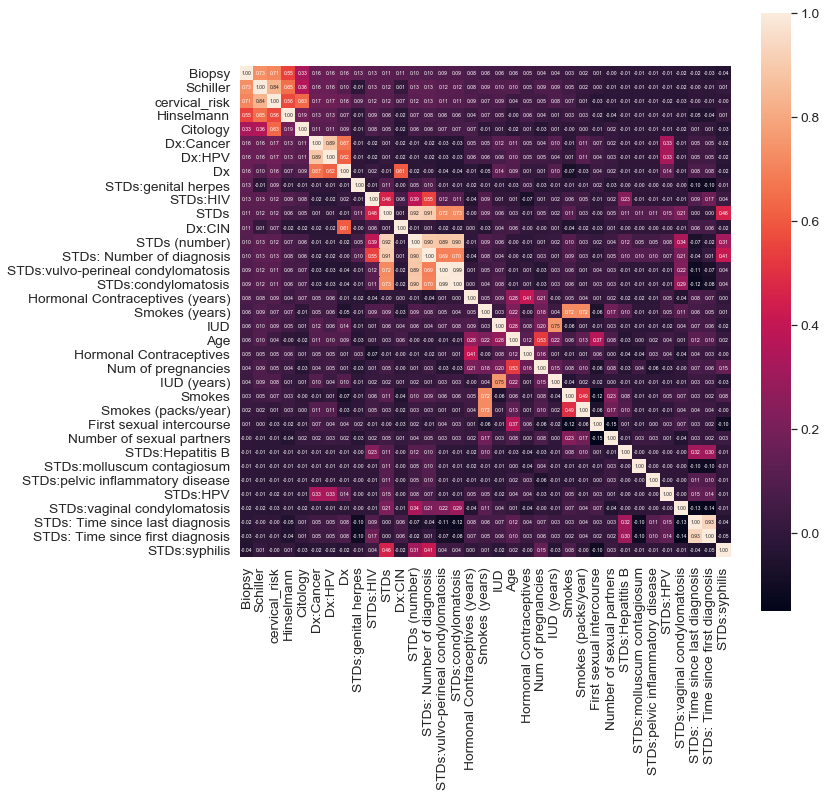

In [88]:
k = 37
cols = corrmat.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(numeric_df[cols].values.T)

plt.figure(figsize=(11,11))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5},
                yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [89]:
df_reduced= numeric_df[["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "Smokes", "Hormonal Contraceptives", "IUD", "STDs", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "cervical_risk"]]

In [90]:
df_reduced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,cervical_risk
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,1.0,0.0,0.0,1,0,1,0,0
4,46,3.0,21.0000,4.0,0.0,1.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0000,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,51,3.0,17.0000,6.0,1.0,0.0,1.0,0.0,0,0,0,0,1
7,26,1.0,26.0000,3.0,0.0,1.0,1.0,0.0,0,0,0,0,0
8,45,1.0,20.0000,5.0,0.0,0.0,0.0,0.0,1,0,1,1,0
9,44,3.0,15.0000,2.0,1.0,0.0,0.0,0.0,0,0,0,0,0


In [91]:
df_reduced.to_csv("../data/clean_v3_reduced.csv")